In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('globalterrorismdb_0718dist.csv',encoding = "ISO-8859-1", low_memory=False)
df = pd.DataFrame(data)
grouped_single = df.groupby(['country_txt','targtype1_txt']).agg({'targtype1_txt': 'count'})

type(grouped_single)
# grouped_single.reset_index(drop=False, inplace=True)
grouped_single.rename(columns ={'targtype1_txt':'Count'}, inplace=True)
grouped_single.reset_index(drop=False, inplace=True)
grouped_single.rename(columns = {'country_txt': 'Country', 'targtype1_txt': 'Target_Type'}, inplace=True)
afg = grouped_single[grouped_single.Country == 'Afghanistan']
afg

# country = grouped_single['Country']
# target_type = grouped_single['Target_Type']
# count = grouped_single['Count']
# grouped_single
# with open('targtype1_txt.csv', 'a') as f:
#     grouped_single.to_csv(f)


,Country,Target_Type,Count
0,Afghanistan,Airports & Aircraft,64
1,Afghanistan,Business,464
2,Afghanistan,Educational Institution,325
3,Afghanistan,Food or Water Supply,14
4,Afghanistan,Government (Diplomatic),151
5,Afghanistan,Government (General),1626
6,Afghanistan,Journalists & Media,80
7,Afghanistan,Military,2270
8,Afghanistan,NGO,158
9,Afghanistan,Other,8


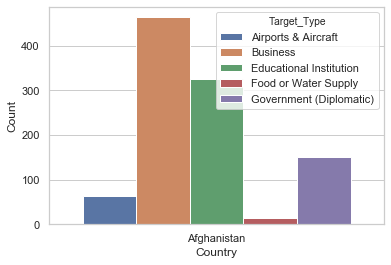

In [120]:
sns.set(style="whitegrid")

sns.barplot(x= afg.Country[:5], y= afg.Count, hue = afg.Target_Type[:5], data=grouped_single)

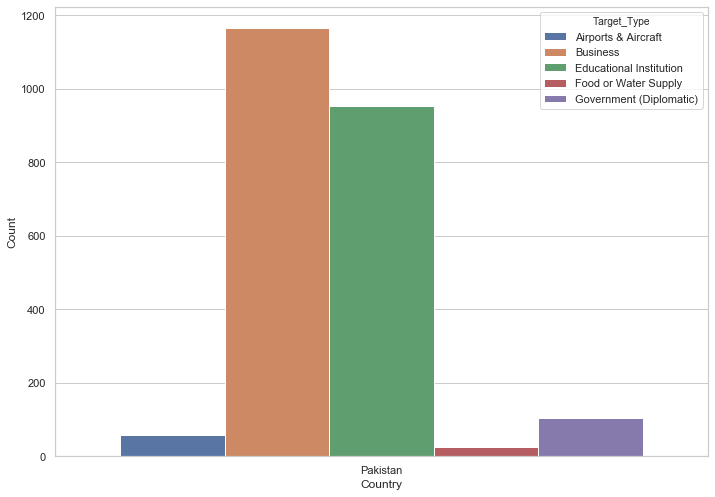

In [172]:
alb = grouped_single[grouped_single.Country == 'Pakistan']
sns.set(style="whitegrid")

sns.barplot(x= alb.Country[:5], y= alb.Count, hue = alb.Target_Type[:5], data=grouped_single)

In [129]:
ct = pd.concat([afg[:5], alb[:5]])
ct

,Country,Target_Type,Count
0,Afghanistan,Airports & Aircraft,64
1,Afghanistan,Business,464
2,Afghanistan,Educational Institution,325
3,Afghanistan,Food or Water Supply,14
4,Afghanistan,Government (Diplomatic),151
20,Albania,Business,6
21,Albania,Educational Institution,2
22,Albania,Government (Diplomatic),3
23,Albania,Government (General),30
24,Albania,Journalists & Media,4


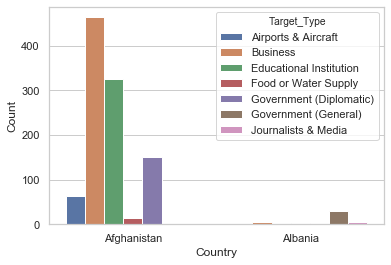

In [130]:
sns.set(style="whitegrid")
sns.barplot(x= ct.Country, y= ct.Count, hue = ct.Target_Type, data=grouped_single)

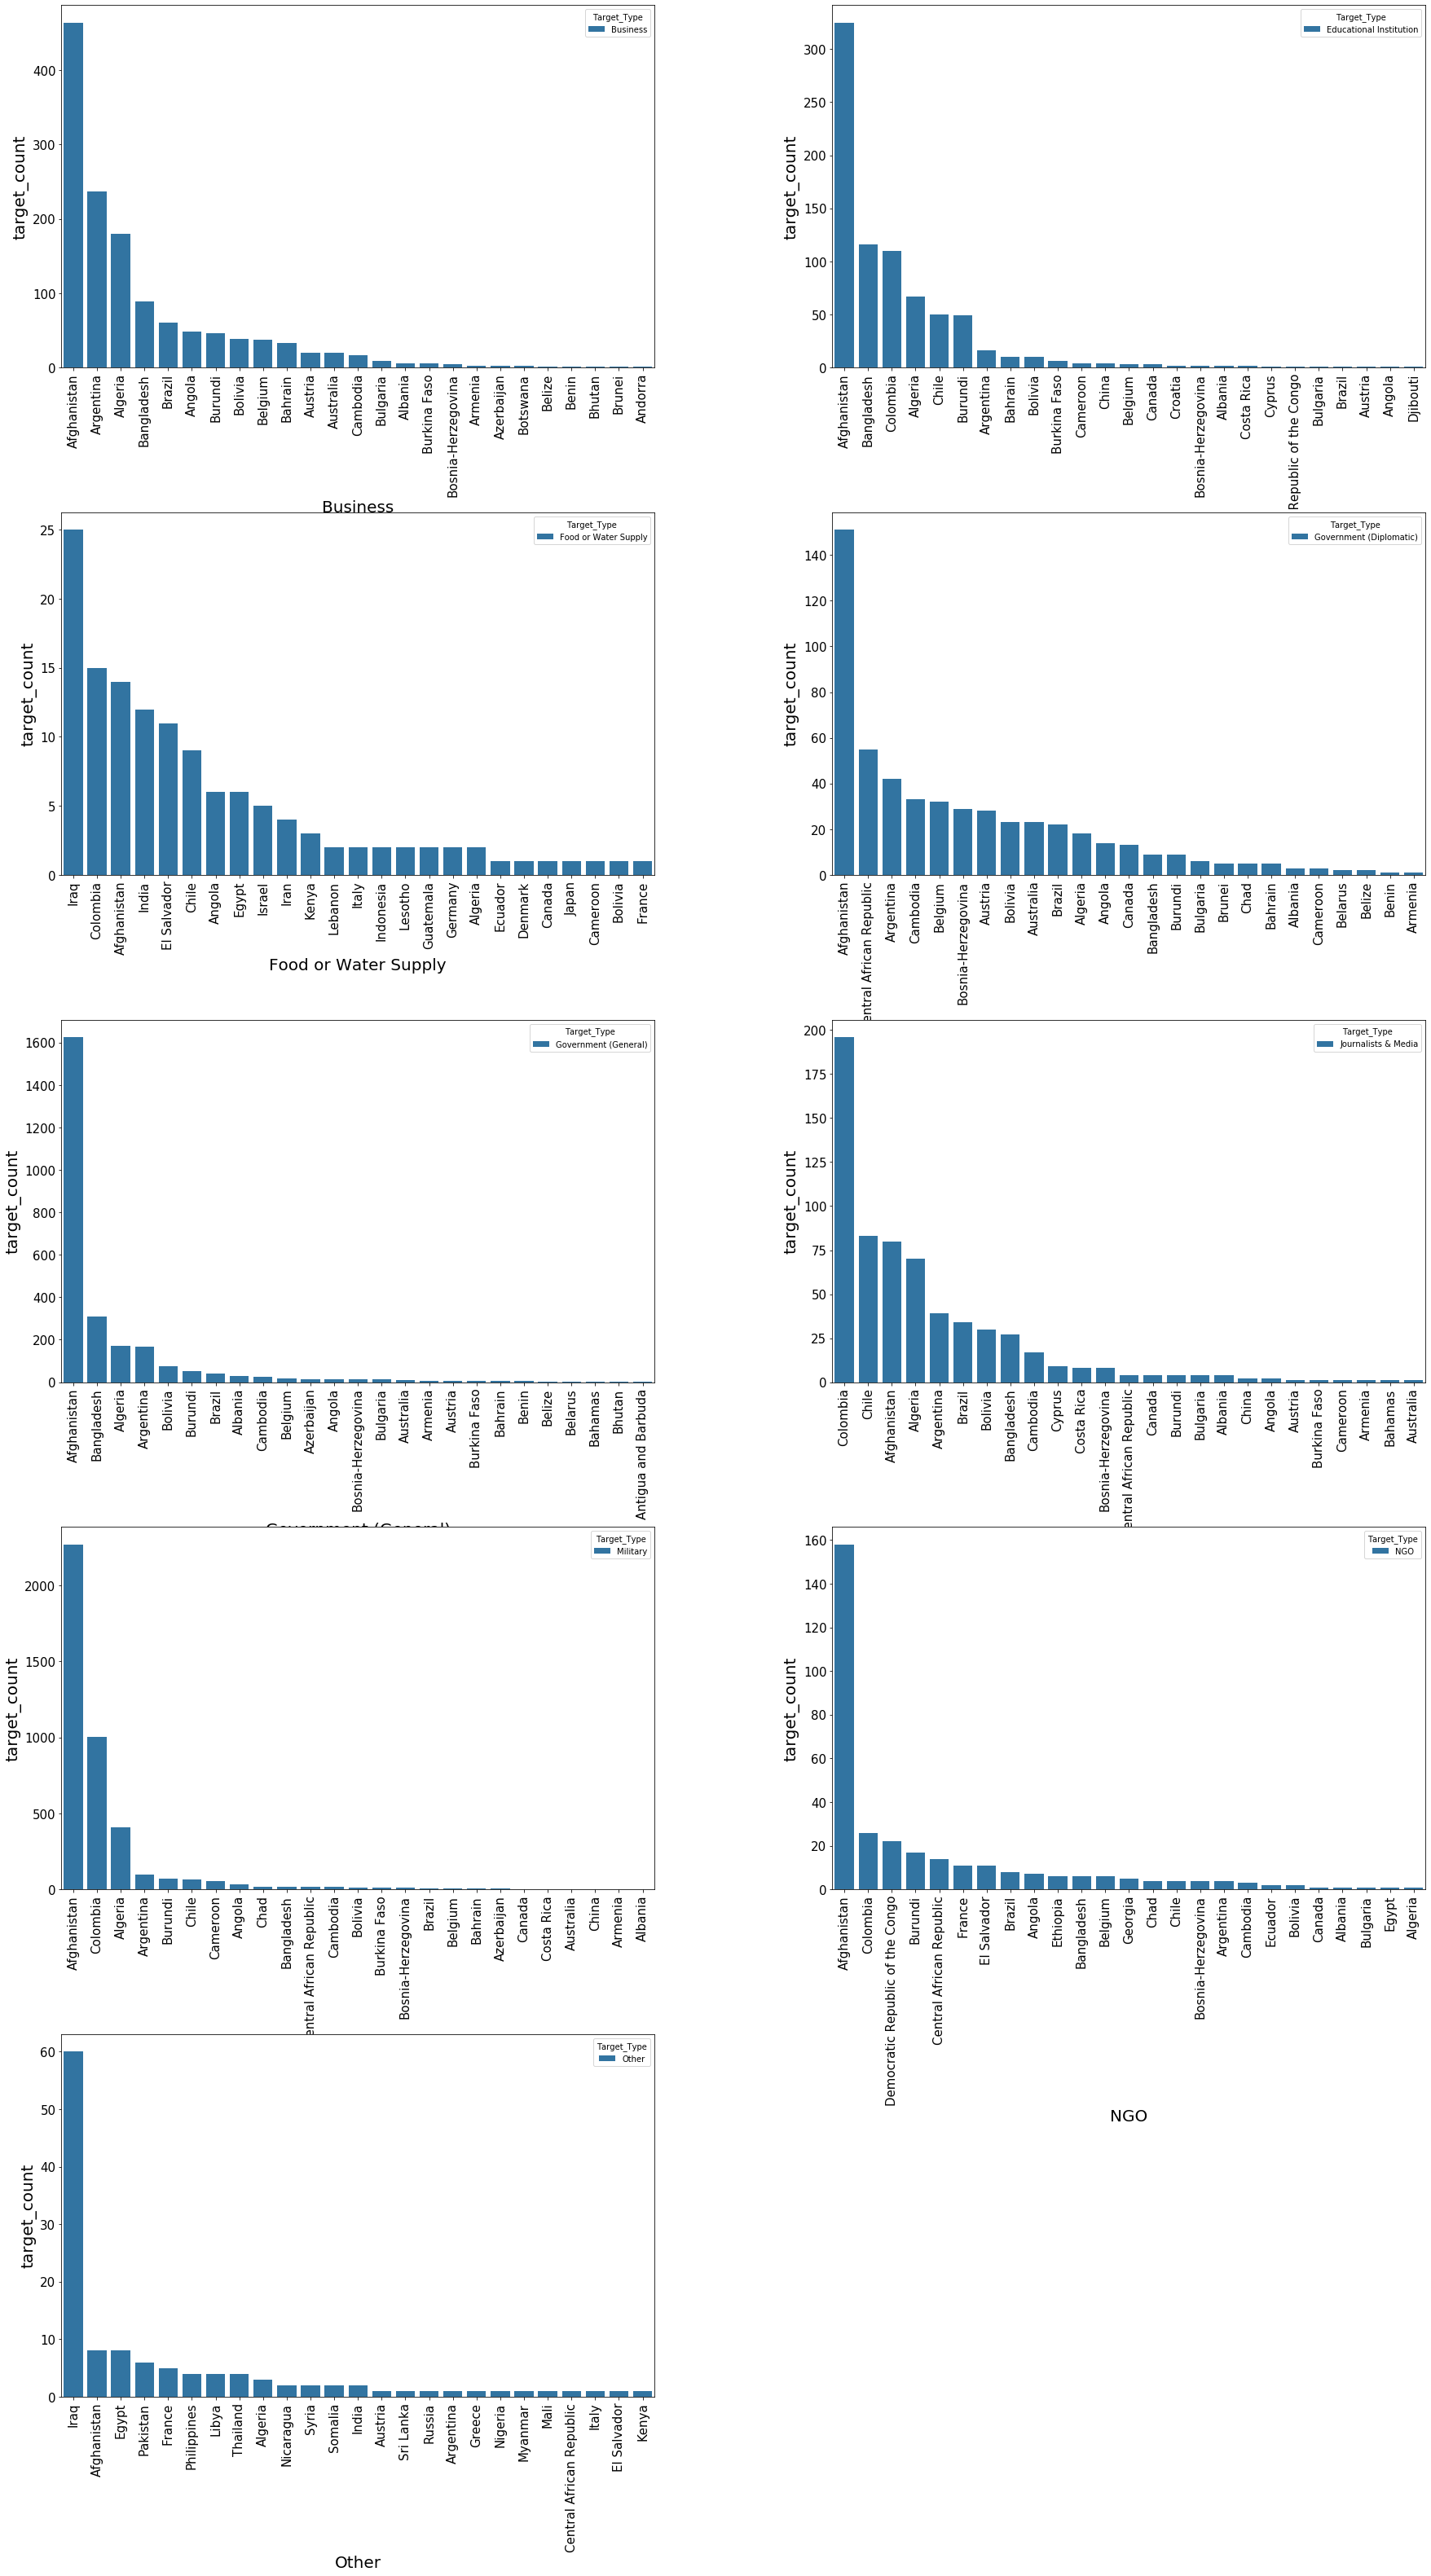

In [75]:
target = grouped_single['Target_Type'].unique()[:10]
dfObj = pd.DataFrame(columns=['Country', 'Target_Type', 'Count'])
for value in target:
    concatinated_data = grouped_single[grouped_single.Target_Type == value]
    dfObj = pd.concat([dfObj, concatinated_data[:25].sort_values(by='Count', ascending=False)],axis = 0)

dfObj

fig= plt.figure(figsize=(30,54))
fig.subplots_adjust(hspace=0.4,wspace=0.3)
for i in range(1,10):
    ax=fig.add_subplot(5,2,i)
    tempDTFrame = dfObj[dfObj.Target_Type == target[i]]
    ax=sns.barplot(x=tempDTFrame.Country,y=tempDTFrame.Count,hue =tempDTFrame.Target_Type)
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(target[i],fontsize=20)
    plt.ylabel('target_count',fontsize=20)
fig.savefig("output.png")


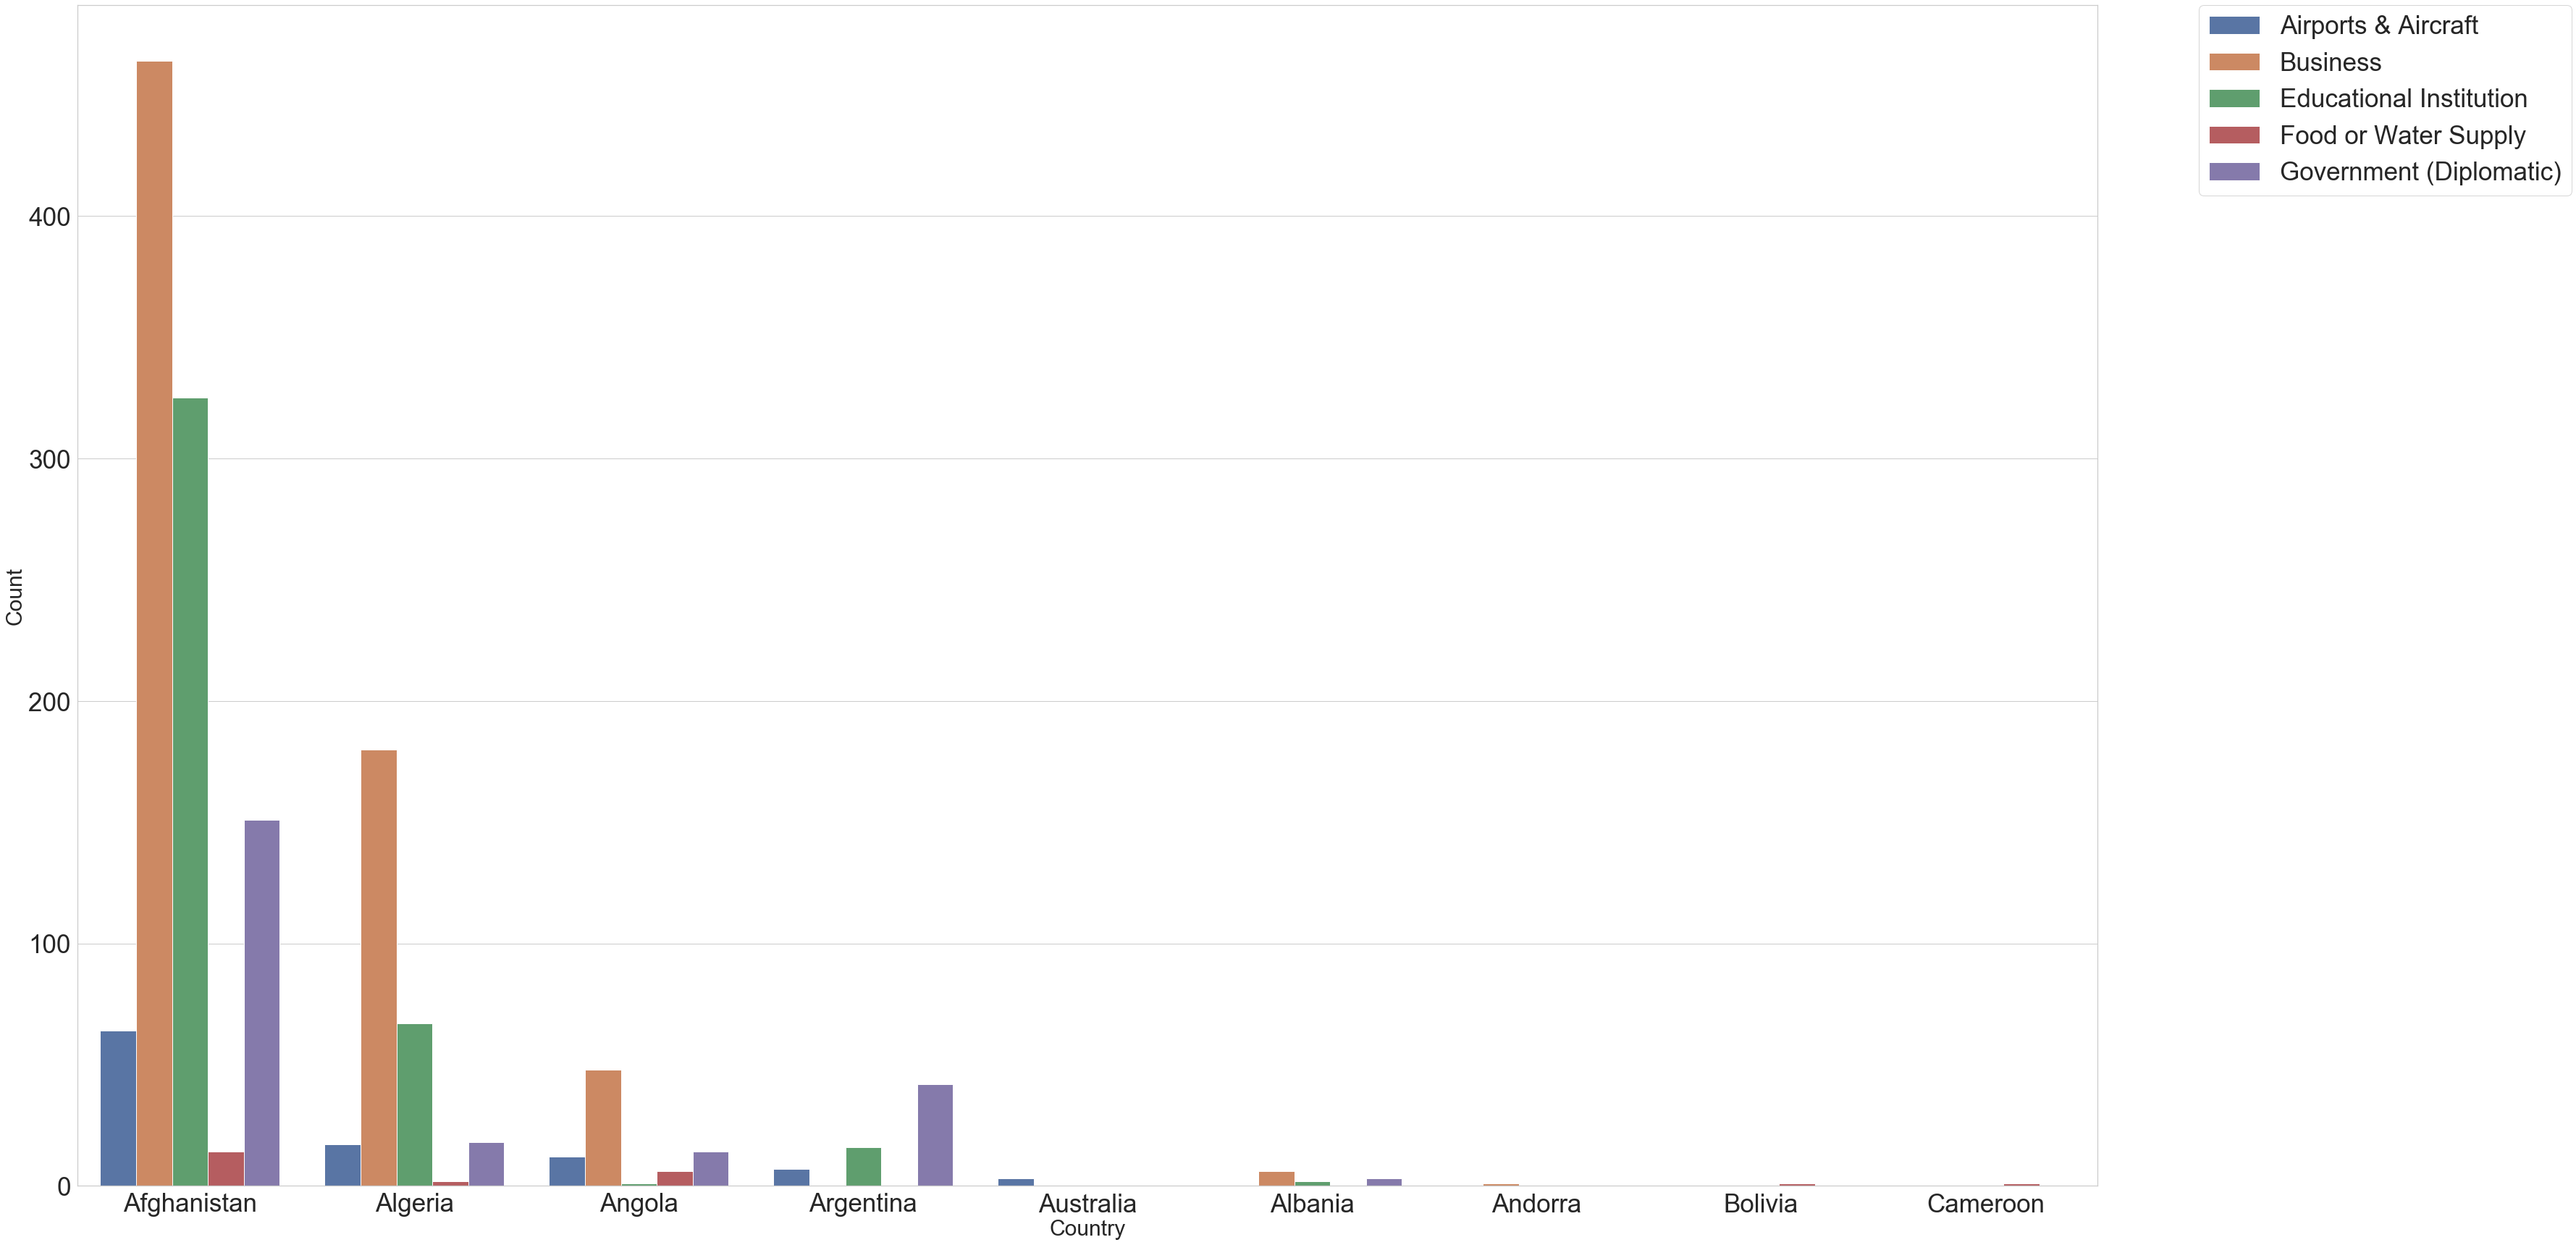

In [88]:
target = grouped_single['Target_Type'].unique()[:5]
dfObj = pd.DataFrame(columns=['Country', 'Target_Type', 'Count'])
for value in target:
    concatinated_data = grouped_single[grouped_single.Target_Type == value]
    dfObj = pd.concat([dfObj, concatinated_data[:5].sort_values(by='Count', ascending=False)],axis = 0)

dfObj
sns.set(rc={'figure.figsize':(50,30)})
sns.set(style="whitegrid")
b = sns.barplot(x= dfObj.Country, y= dfObj.Count, hue = dfObj.Target_Type, data=concatinated_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fontsize = 35)
b.set_xlabel("Country",fontsize=30)
b.set_ylabel("Count",fontsize=30)
b.tick_params(labelsize=35)


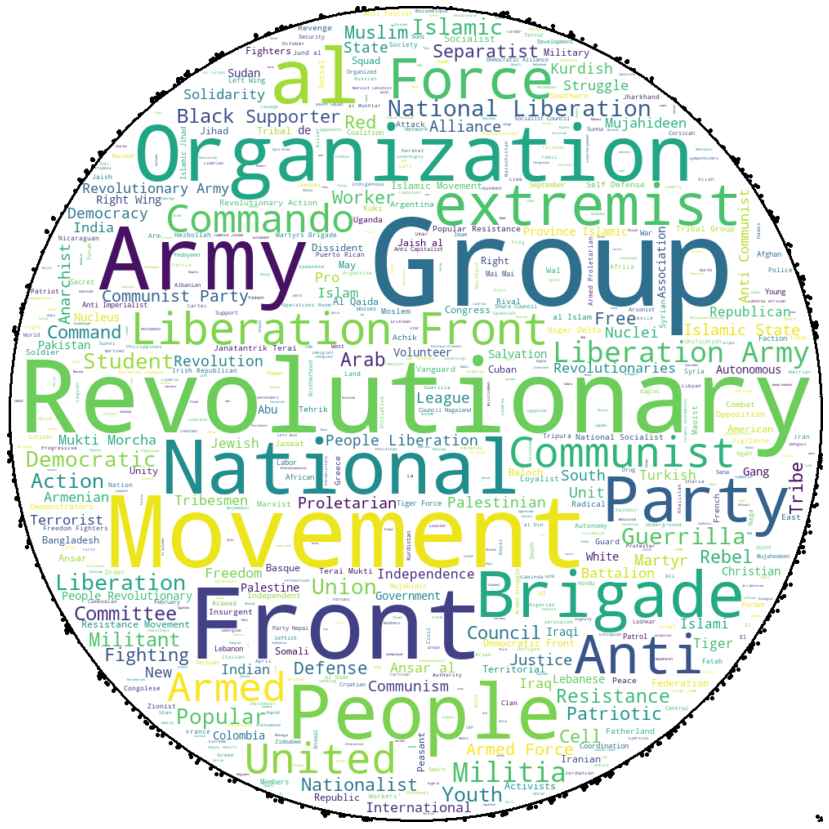

In [80]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

df = pd.DataFrame(data)
motive = df['gname']
motive.dropna(axis=0, how='any', inplace=True)
unique_motives = motive.unique()
motive_str = ''
for each in unique_motives:
    if motive_str =='' and motive_str !='Unknown':
        motive_str = each
    else:
        motive_str =motive_str+' '+str(each)
motive_str   

def image_generator(image):
    python_mask = np.array(Image.open(image))
    wcObj = WordCloud(background_color="white", max_words=1000, mask=python_mask, contour_width=3, contour_color='black')
    wcObj.generate(motive_str)
    fig=plt.figure(figsize=(20,15))
    plt.imshow(wcObj,interpolation='bilinear')
    plt.axis('off')
    plt.show()
    fig.savefig("word_cloud_group_name.png")

image_generator('circle.jpeg')

In [21]:

# df = pd.DataFrame(data)
# country_name = df.loc[:,["country_txt","ransomamt"]] 
# # ransom_amt = df.loc["ransomamt"] 
  
  
# print(country_name) 

               country_txt  ransomamt
0       Dominican Republic        NaN
1                   Mexico   800000.0
2              Philippines        NaN
3                   Greece        NaN
4                    Japan        NaN
5            United States        NaN
6                  Uruguay        NaN
7            United States        NaN
8            United States        NaN
9            United States        NaN
10           United States        NaN
11           United States        NaN
12                   Italy        NaN
13           United States        NaN
14           United States        NaN
15      East Germany (GDR)        NaN
16                Ethiopia        NaN
17           United States        NaN
18           United States        NaN
19           United States        NaN
20           United States        NaN
21                 Uruguay        NaN
22           United States        NaN
23           United States        NaN
24           United States        NaN
25          

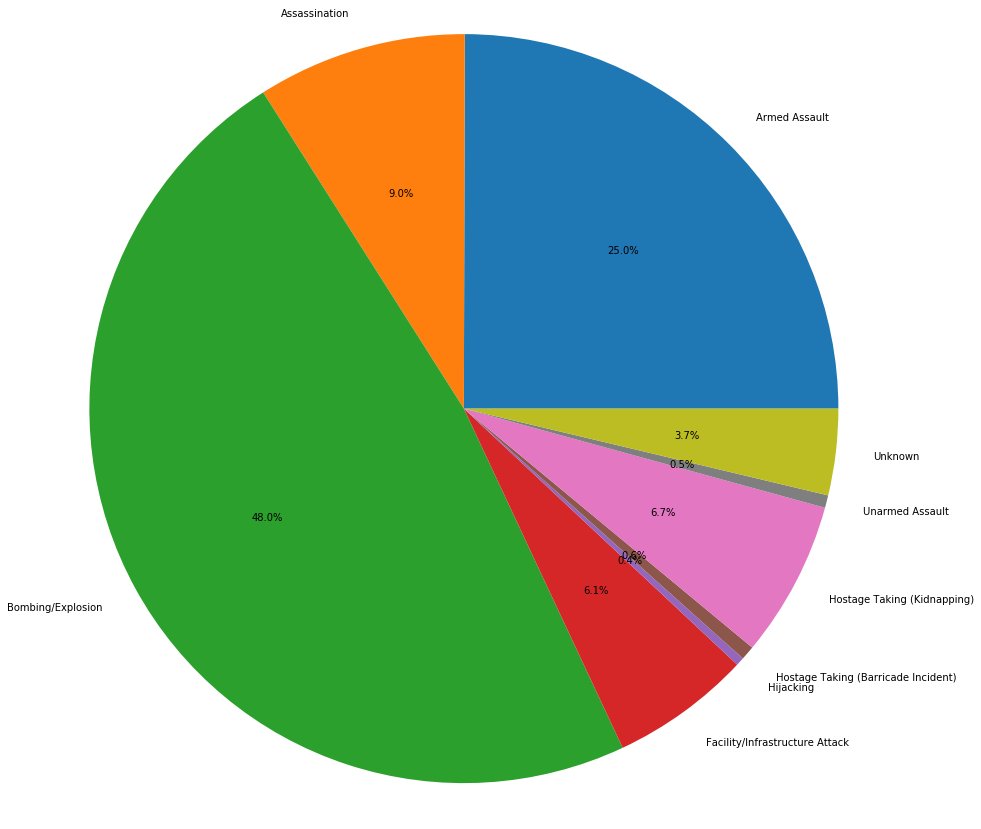

In [79]:
df = pd.DataFrame(data)
success_df = df[df['success'] == 1].loc[:,['attacktype1_txt','success']]
grouped_attack = success_df.groupby(['attacktype1_txt','success']).agg({'success': 'count'})
grouped_attack.rename(columns ={'success':'Count'}, inplace=True)
grouped_attack.reset_index(drop=False, inplace=True)
grouped_attack.rename(columns = {'attacktype1_txt': 'Attack_Type', 'success': 'Success'}, inplace=True)
# display(grouped_attack)
labels = grouped_attack.Attack_Type
sizes = grouped_attack.Count
fig1, ax1 = plt.subplots(figsize=(15, 15))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False,labeldistance=1.1)
ax1.axis('equal')
plt.show()
fig1.savefig("pie_chart_attack_type_percent.png")
